<h1>Time Series Forecasting Using Multi-Layer Perceptrons (MLP)</h1>
The task is to predict future monthly retail sales based on historical monthly retail sales data from U.S. Census Bureau, which can be used to train and test the model. The MLP model is applied to forecast future sales and it is a popular approach for time series forecasting because it can learn complex relationships and handle various input features and structures.

In [20]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from tensorflow import keras
from keras.models import Sequential
from keras.layers import LSTM, Dense, Conv1D, MaxPooling1D, Flatten
from keras.optimizers import Adam

In [21]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

# Original Data Source: https://fred.stlouisfed.org/series/RSXFSN
from google.colab import drive
drive.mount('/content/drive')

# Load the dataset from the CSV file
df = pd.read_csv('/content/sample_data/RSXFSN.csv')
# Keep only the 'RSXFSN' column
keep_columns = ['RSXFSN']
df = df[keep_columns]
# Rescale the data
df = df/10000

#--------------------Data Preprocessing--------------------
# Split the data into training and testing sets
n_train = int(len(df) * 0.8)
n_test = len(df) - n_train
train, test = df.iloc[0:n_train], df.iloc[n_train:len(df)]
print(len(train), len(test))

# Define a function to convert the data into a time series format
def get_timeseries(x, n_steps=1):
    x_ts, y_ts = [], []
    for ii in range(len(x) - n_steps):
        # Create a time series input sequence
        v = x.iloc[ii:(ii + n_steps)].values
        x_ts.append(v)
        # Create a time series output sequence
        w = x.iloc[ii + n_steps].values
        y_ts.append(w)
    return np.array(x_ts), np.array(y_ts)

# Set the number of time steps and features
n_steps = 16
n_features = 1

# Convert to a time series dimension: [samples, n_steps, n_features]
x_train, y_train = get_timeseries(train, n_steps)
x_test, y_test = get_timeseries(test,n_steps)

print(x_train.shape, y_train.shape)

#--------------------MLP Modeling--------------------
# Define the architecture of the MLP model.
# This MLP model consists of two fully connected layers. 
model = Sequential()
# The first layer has 50 neurons with ReLU activation function and takes input of shape (batch_size, n_steps), where n_steps is the number of time steps in the input time series. 
model.add(Dense(50, activation='relu', input_dim=n_steps))
# The second layer has a single neuron with no activation function, which outputs the predicted value of the next time step.
model.add(Dense(1))
# Compile model with loss function is mean squared error, which measures the difference between the predicted and actual values. 
# The optimizer used is Adam with a learning rate of 0.001. The optimizer updates the model parameters during training to minimize the loss function
model.compile(loss='mean_squared_error', optimizer=Adam(0.001))

#-------------------- MLP Training--------------------
# Fit model
# epochs parameter specifies the number of times the training dataset will be iterated over during training
# batch_size parameter specifies the number of samples that will be propagated through the network at once
# validation_split parameter specifies the fraction of the training data to be used as validation data
# verbose parameter controls the verbosity of the training process
# shuffle parameter controls whether to shuffle the training data at each epoch
history = model.fit(x_train, y_train,epochs=500,batch_size=32,validation_split=0.1,verbose = 1, shuffle = False)

#--------------------MLP Evaluation--------------------
# Predict on test data
y_pred = model.predict(x_test)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
300 75
(284, 16, 1) (284, 1)
Epoch 1/500
8/8 [==============================] - 0s 23ms/step - loss: 611.8478 - val_loss: 525.2709
Epoch 2/500
8/8 [==============================] - 0s 6ms/step - loss: 78.5640 - val_loss: 11.2803
Epoch 3/500
8/8 [==============================] - 0s 6ms/step - loss: 22.5465 - val_loss: 79.9947
Epoch 4/500
8/8 [==============================] - 0s 6ms/step - loss: 40.8854 - val_loss: 57.8813
Epoch 5/500
8/8 [==============================] - 0s 6ms/step - loss: 12.2797 - val_loss: 8.6958
Epoch 6/500
8/8 [==============================] - 0s 6ms/step - loss: 5.7998 - val_loss: 12.5568
Epoch 7/500
8/8 [==============================] - 0s 6ms/step - loss: 7.8181 - val_loss: 10.5080
Epoch 8/500
8/8 [==============================] - 0s 8ms/step - loss: 5.2978 - val_loss: 7.2095
Epoch 9/500
8/8 [==============================] - 0

<h1>Time Series Forecasting Using Convolutional Neural Network (CNN)</h1>
I implement 1D CNN model with the following architecture:

*   The first layer is a 1D convolutional layer (Conv1D) with 64 filters and a kernel size of 3. The activation function used is ReLU. The input shape is (16,1), where 16 is the number of time steps and 1 is the number of features.
*   The second layer is a max pooling layer (MaxPooling1D) with a pool size of 2, which reduces the dimensionality of the output from the first layer. 
*   The third layer is a flatten layer, which flattens the output of the previous layer into a one-dimensional array.
*   The fourth layer is a dense layer (Dense) with 100 units and a ReLU activation function.
*   The fifth and final layer is another dense layer with 1 unit and a linear activation function, which is used to predict the target variable.

The model is compiled with the Adam optimizer and mean squared error (MSE) loss function. The model summary shows that there are a total of 45,257 parameters in the model, all of which are trainable.



In [23]:
#--------------------CNN Modeling--------------------
cnn = Sequential()
cnn.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(16,1)))
cnn.add(MaxPooling1D(pool_size=2))
cnn.add(Flatten())
cnn.add(Dense(100, activation='relu'))
cnn.add(Dense(1, activation='linear'))
# compile the model with suitable loss function and optimizer
cnn.compile(optimizer ='adam', loss = 'mse')
cnn.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_5 (Conv1D)           (None, 14, 64)            256       
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 7, 64)            0         
 1D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 448)               0         
                                                                 
 dense_10 (Dense)            (None, 100)               44900     
                                                                 
 dense_11 (Dense)            (None, 1)                 101       
                                                                 
Total params: 45,257
Trainable params: 45,257
Non-trainable params: 0
__________________________________________________

In [22]:
#-------------------- CNN Training--------------------
# train the model on the training set
history_cnn = cnn.fit(x_train, y_train, epochs=500, batch_size=32, validation_split=0.1,verbose = 1, shuffle = False)

#-------------------- CNN Evaluation --------------------
y_pred_cnn = cnn.predict(x_test)


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 14, 64)            256       
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 7, 64)            0         
 1D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 448)               0         
                                                                 
 dense_6 (Dense)             (None, 100)               44900     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 45,257
Trainable params: 45,257
Non-trainable params: 0
__________________________________________________

2/2 [==============================] - 0s 4ms/step


As we can see

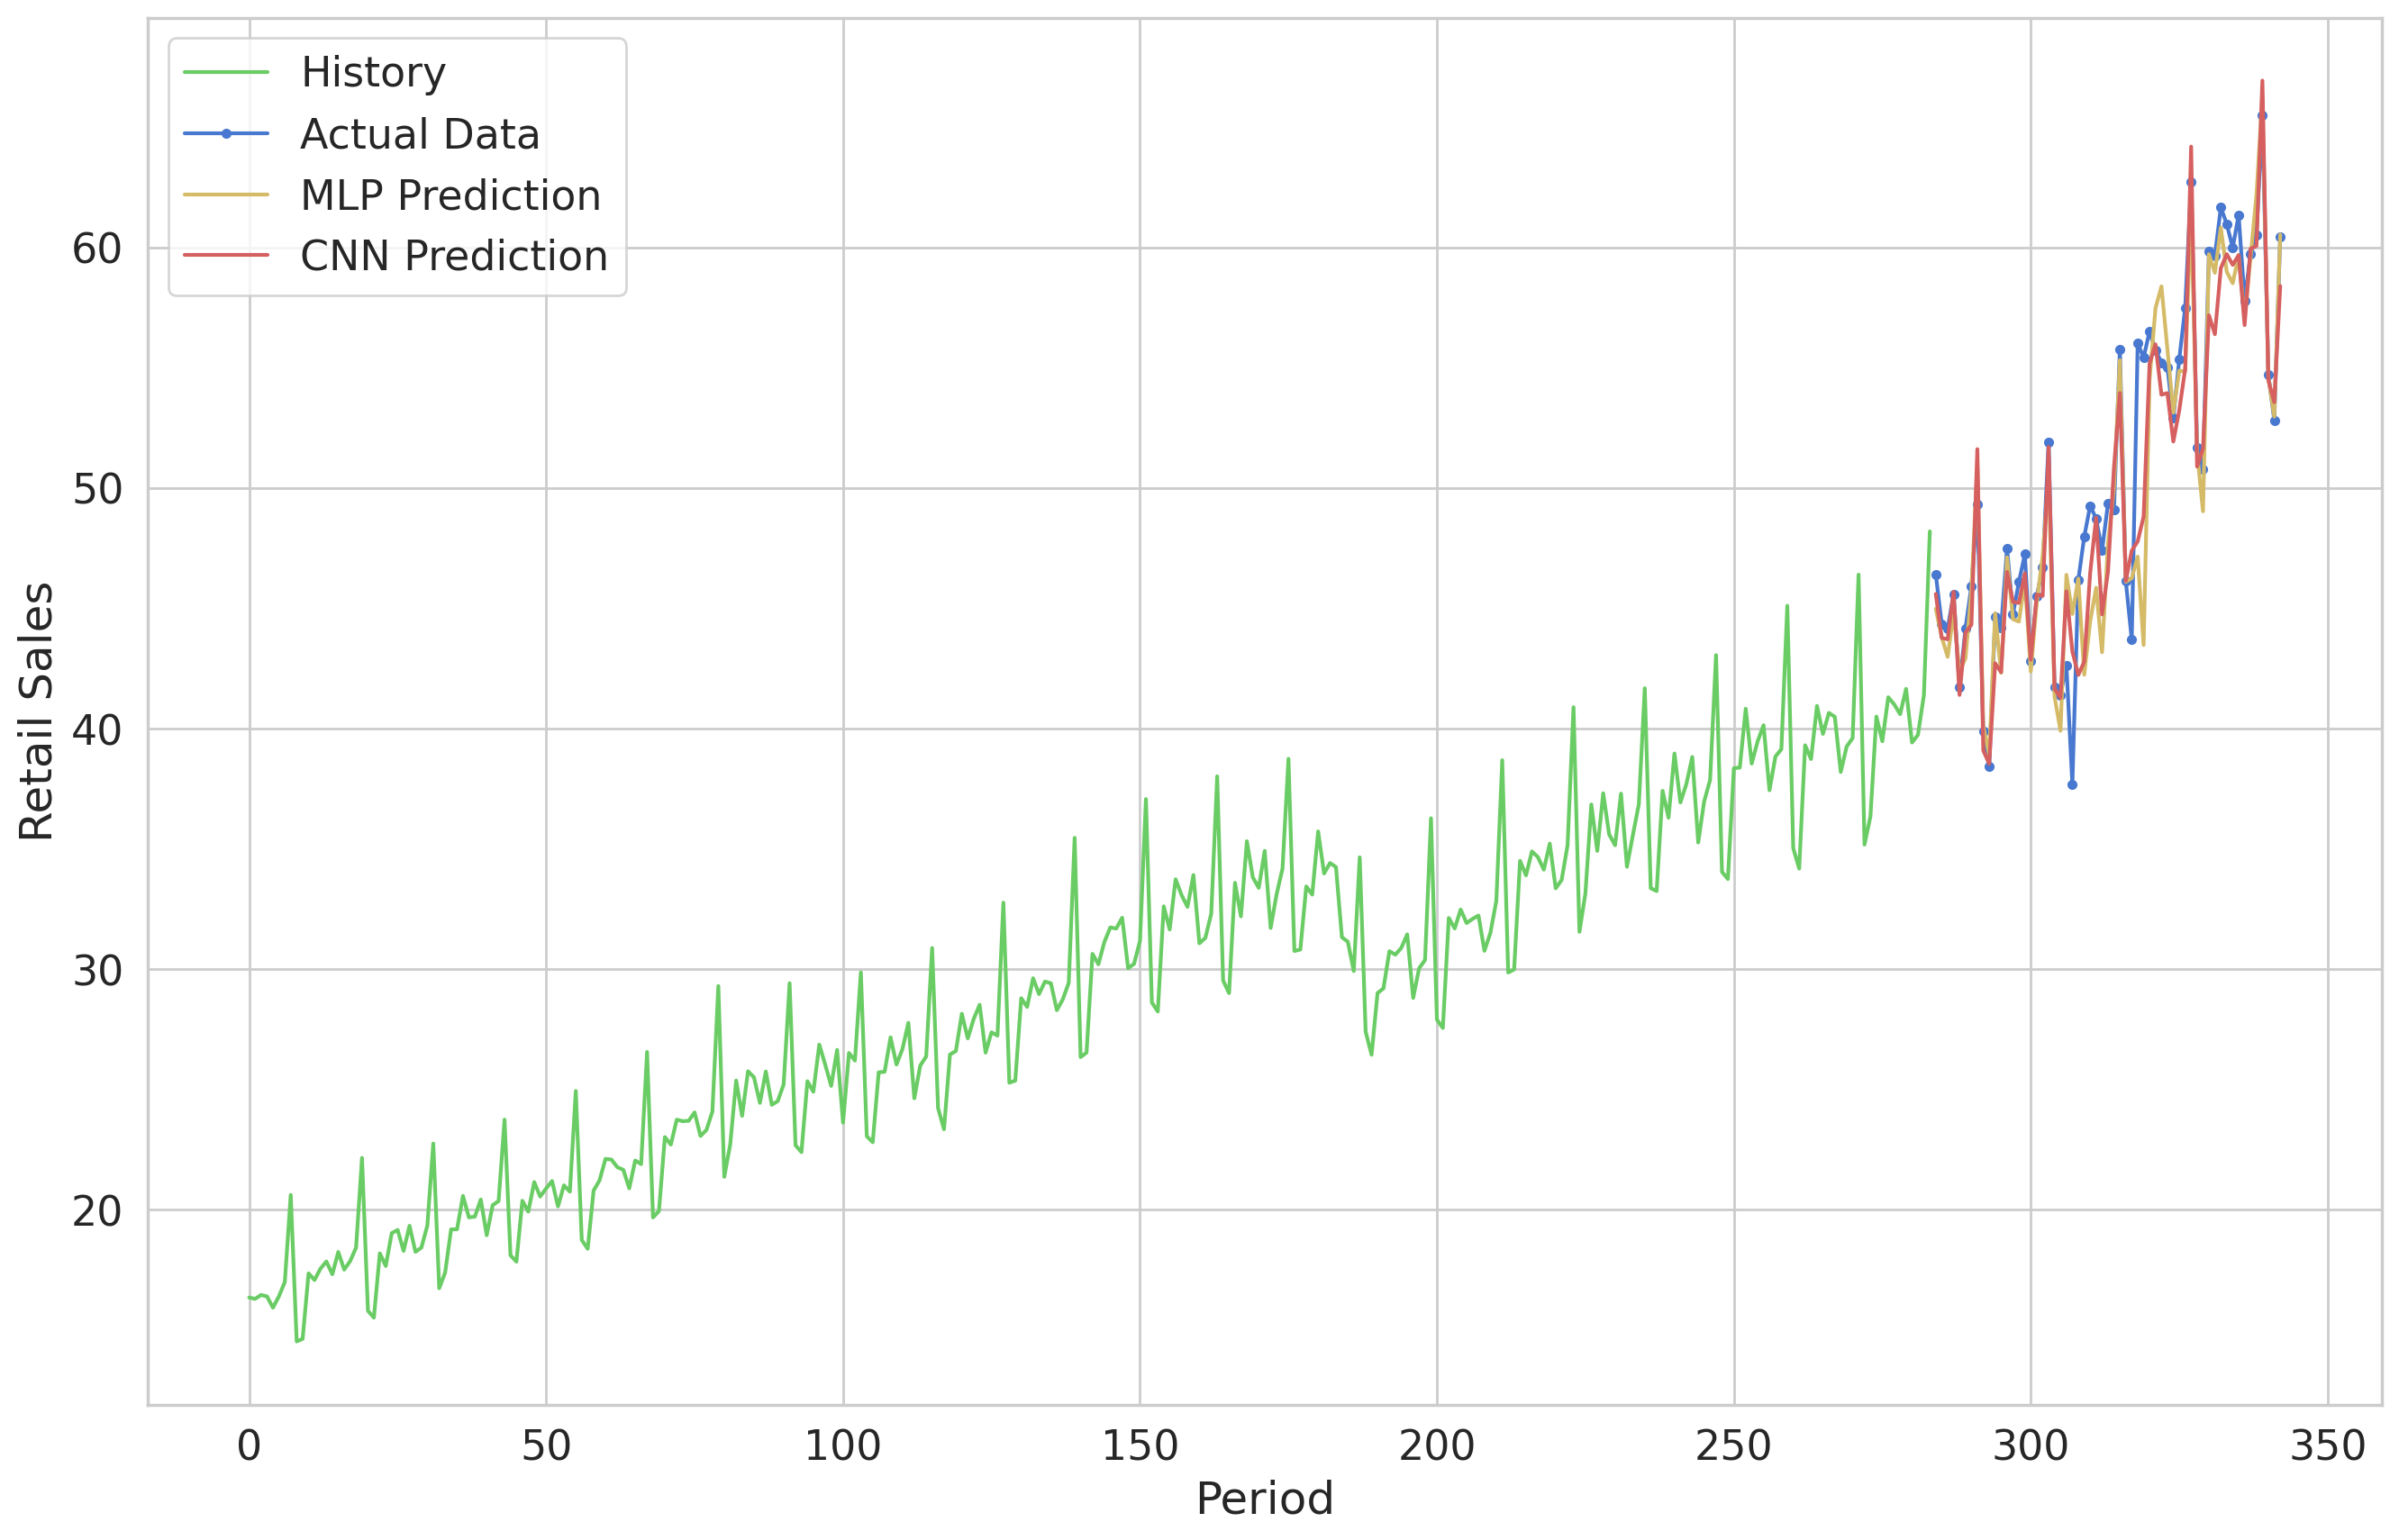

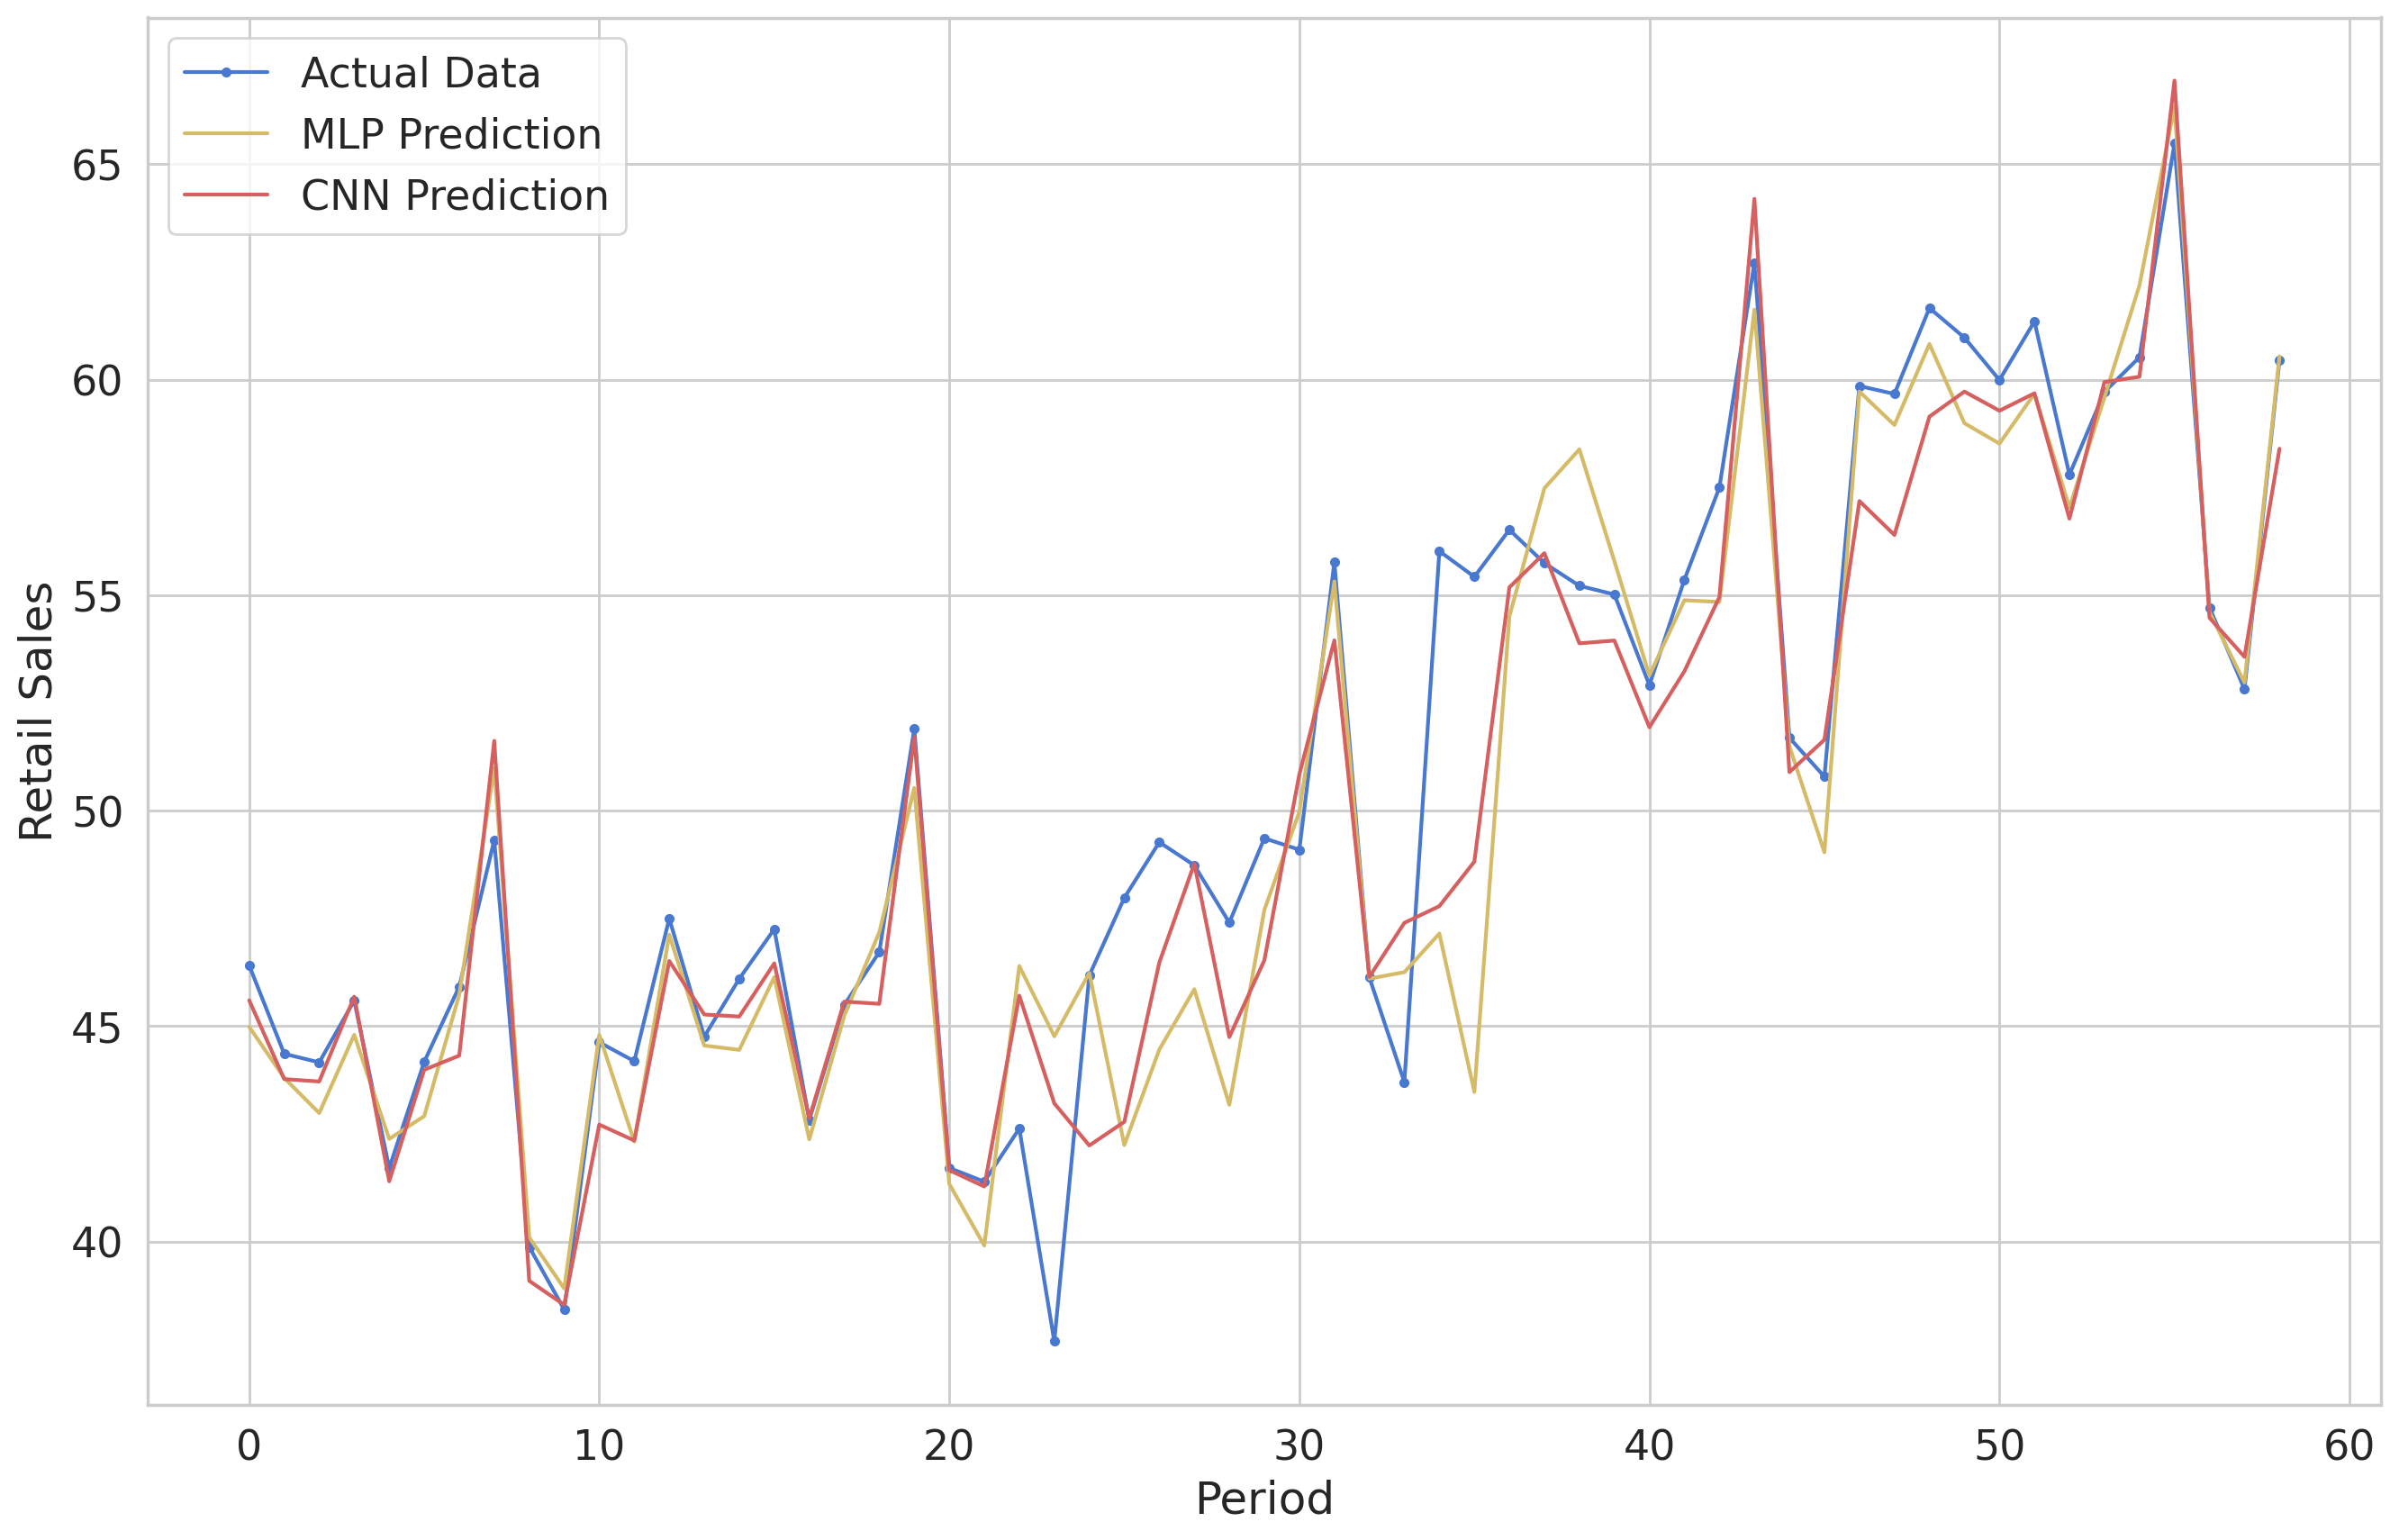

In [26]:
#Visualize the actual retail sales data, MLP and CNN model predictions
rcParams['figure.figsize'] = 16, 10
plt.plot(np.arange(0, len(y_train)), y_train, 'g', label="History")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, marker='.', label="Actual Data")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred, 'y', label="MLP Prediction")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred_cnn, 'r', label="CNN Prediction")
plt.ylabel('Retail Sales')
plt.xlabel('Period')
plt.legend()
plt.show();

plt.plot(y_test, marker='.', label="Actual Data")
plt.plot(y_pred, 'y', label="MLP Prediction")
plt.plot(y_pred_cnn, 'r', label="CNN Prediction")
plt.ylabel('Retail Sales')
plt.xlabel('Period')
plt.legend()
plt.show();

<H1>Comparision and Performance</h1>

In terms of architecture: 
The MLP model has two fully connected (dense) layers, while the CNN model has one convolutional layer, one max pooling layer, one flatten layer, and two dense layers. The CNN model has more layers and a more complex architecture than the MLP model.

In terms of performance: 


*   CNN is better able to capture local patterns in the data. In time series data, there are often patterns that occur over a small window of time, but not over the entire time series. CNN is well-suited to capture these local patterns due to the use of convolutional filters.


*   By using pooling layers, CNN can reduce the size of the input data, which can help to reduce the risk of overfitting and improve the efficiency of the model.
*   As we can see, CNN model has better performance with MSE loss = 0.3884 and val_loss = 0.4123 than the MLP model with MLE loss = 0.6039 and val_loss = 0.5232
